In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score,confusion_matrix,classification_report
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df_Car = pd.read_csv('Car Ownership.csv')
df_Car.head()

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2


Getting total no. of null values in the dataset

In [3]:
df_Car.isnull().sum()

Occupation              10
Monthly Income          13
Credit Score            40
Years of Employment     43
Finance Status          23
Finance History         28
Car                     20
Number of Children     125
dtype: int64

Now, to get rid of the null values; we wiil drop the null values

In [4]:
df_Car.dropna(inplace = True)
df_Car.isnull().sum()

Occupation             0
Monthly Income         0
Credit Score           0
Years of Employment    0
Finance Status         0
Finance History        0
Car                    0
Number of Children     0
dtype: int64

1    207
0    108
Name: Car, dtype: int64


<Axes: xlabel='Car', ylabel='count'>

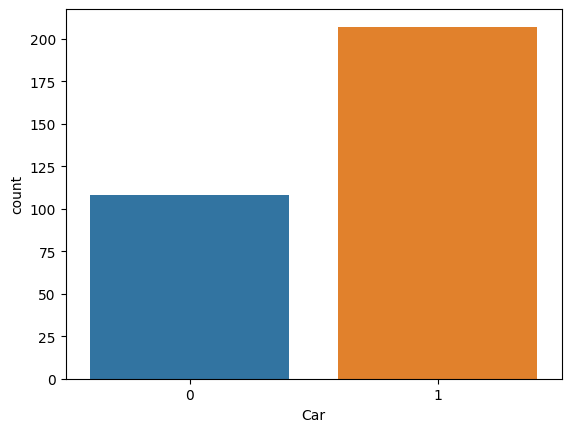

In [5]:
df_Car['Car'] = df_Car.Car.map({'Yes':1,'No':0})
print(df_Car.Car.value_counts())
sns.countplot(data=df_Car, x='Car')

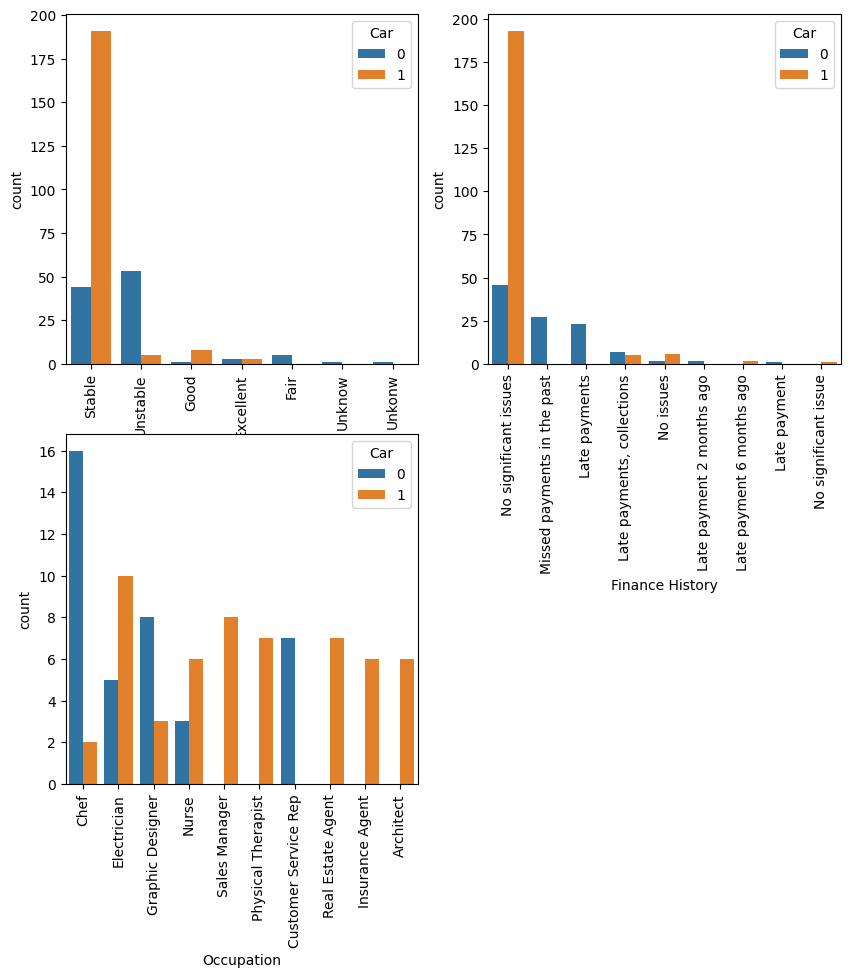

In [6]:
category_column = ['Finance Status','Finance History','Occupation',]
fig,ax = plt.subplots(figsize=(10,10))
for num,i in enumerate(category_column,1):
    plt.subplot(2,2,num)
    sns.countplot(x=df_Car[i],hue='Car',data=df_Car,order=df_Car[i].value_counts().head(10).index)
    plt.legend(title='Car',loc='upper right')
    plt.xticks(rotation=90)
plt.show()

Now we will plot monthly incomw VS the vredit score scatter plot.

In [7]:
df_Car['Monthly Income'] = df_Car['Monthly Income'].apply(lambda x:str(x).replace('$','').replace(',','').replace('USD','').replace('usd',''))
df_Car['Monthly Income'] = df_Car['Monthly Income'].apply(lambda x:str(x).rstrip())
df_Car['Monthly Income'] = df_Car['Monthly Income'].apply(lambda x:float(x[:-1])*1000 if x.endswith('k') else int(x))
df_Car['Years of Employment'] = df_Car['Years of Employment'].apply(lambda x:str(x).replace(' years','').replace(' year','').replace(' y',''))
df_Car['Finance History'] = df_Car['Finance History'].apply(lambda x:str(x).replace('No significant issues','No significant issue').replace('Late payments','Late payment'))
df_Car['Finance Status'] = df_Car['Finance Status'].apply(lambda x:str(x).replace('Unkonw','Unknow'))

<Axes: xlabel='Monthly Income', ylabel='Credit Score'>

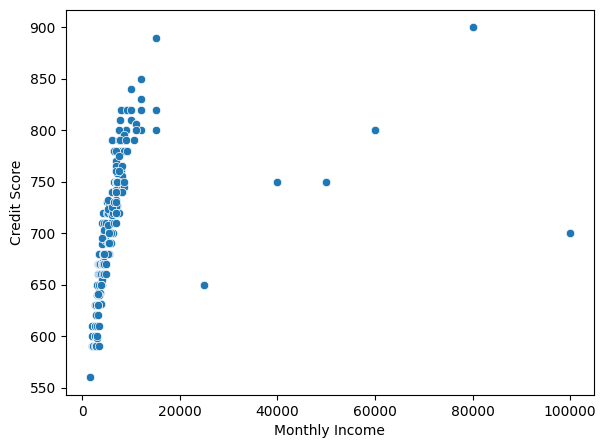

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_Car,x='Monthly Income',y='Credit Score')

In [9]:
occupationVSincome = df_Car.groupby('Occupation')['Monthly Income'].sum().reset_index().sort_values('Monthly Income',ascending=False).head(10).reset_index(drop=True)
occupationVSincome

,Occupation,Monthly Income
0,Engineer,235500.0
1,Businessman,200000.0
2,Doctor,160000.0
3,Teacher,88200.0
4,Nurse,85000.0
5,Chef,63300.0
6,Electrician,58900.0
7,Sales Manager,58600.0
8,Physical Therapist,47500.0
9,Architect,46100.0


In [10]:
occupationVScredit = df_Car.groupby('Occupation')['Credit Score'].mean().reset_index().round(2).sort_values('Credit Score',ascending=False).head(10).reset_index(drop=True)
occupationVScredit

,Occupation,Credit Score
0,Doctor,900.00
1,Physician,833.33
2,Entrepreneur,830.00
3,Lawyer,825.00
4,Optometrist,820.00
5,Dentist,820.00
6,Investment Banker,820.00
7,Pharmacist,810.00
8,Attorney,804.00
9,Financial Manager,800.00


# Now we will perform Data Preprocessing i.e split data into train and test after performing label encoding

In [11]:
df_Car_dummy = df_Car[df_Car['Number of Children']!='na']
le = LabelEncoder()
for cd in df_Car_dummy.columns:
    if df_Car_dummy[cd].dtype == 'object':
        df_Car_dummy[cd] = le.fit_transform(df_Car_dummy[cd])

In [12]:
df_Car_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Occupation           286 non-null    int64  
 1   Monthly Income       286 non-null    float64
 2   Credit Score         286 non-null    float64
 3   Years of Employment  286 non-null    int64  
 4   Finance Status       286 non-null    int64  
 5   Finance History      286 non-null    int64  
 6   Car                  286 non-null    int64  
 7   Number of Children   286 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 20.1 KB


In [13]:
X = df_Car_dummy.drop('Car',axis=1)
y = df_Car_dummy['Car']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [15]:
res = pd.DataFrame()
LR_classifier = LogisticRegression()
DT_classifier = DecisionTreeClassifier()
RF_classifier = RandomForestClassifier()
KNN_classifier = KNeighborsClassifier()
NB_classifier = GaussianNB()

Models = [LR_classifier,KNN_classifier,DT_classifier,RF_classifier,NB_classifier]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    prediction = m.predict(X_test)
    
    # confusion matrix
    matrix = confusion_matrix(y_test,prediction)
    print('Confusion matrix : \n', matrix)
    
    TP, FN, FP, TN = confusion_matrix(y_test,prediction).reshape(-1)
    print('Outcome values : \n', TP, FN, FP, TN)

    # classification report for precision, recall f1-score and accuracy
    Classifcation_Report = classification_report(y_test,prediction,labels=[1,0])
    print('Classification report : \n', Classifcation_Report)

    accuracy = round((TP+TN)/(TP+FP+TN+FN), 3)
    precision = round(TP/(TP+FP), 3)
    TPR = round(TP/(TP+FN), 3)
    TNR = round(TN/(TN+FP), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('True Positive Rate :', round(TPR*100,2), '%')
    print('True Negative Rate :', round(TNR*100,2), '%\n' )
    print('roc_auc_score:', round(roc_auc_score(y_test,prediction), 3))
    print('='*50)

Model is: LogisticRegression()
Confusion matrix : 
 [[ 9  5]
 [ 3 41]]
Outcome values : 
 9 5 3 41
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.93      0.91        44
           0       0.75      0.64      0.69        14

    accuracy                           0.86        58
   macro avg       0.82      0.79      0.80        58
weighted avg       0.86      0.86      0.86        58

Accuracy : 86.2 %
Precision : 75.0 %
True Positive Rate : 64.3 %
True Negative Rate : 93.2 %

roc_auc_score: 0.787
Model is: KNeighborsClassifier()
Confusion matrix : 
 [[11  3]
 [ 4 40]]
Outcome values : 
 11 3 4 40
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.91      0.92        44
           0       0.73      0.79      0.76        14

    accuracy                           0.88        58
   macro avg       0.83      0.85      0.84        58
weighted avg       0.88      0.88